<a href="https://colab.research.google.com/github/Prompt-Sopa/CODERHOUSE-NLP-DL/blob/main/TP_Coder_Alsop_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Trabajo Final - CODERHOUSE

- Alumno: Agustin Alsop

##Actividad 2

- Considerando lo visto dentro de las clases de redes neuronales seleccionar un dataset de trabajo (puede ser nuevo o de los preparados para learning estilo MNIST).

- Cargar el dataset usando la función adecuada.

- Hacer una análisis exploratorio e identificar al menos tres insights sobre el mismo.

- Entrenar una red neuronal sencilla al menos dos capas (puede ser convolucional o recurrente).

- Plantear conclusiones.

##Extra

Como se opto desarrollar mas esta actividad se agrega lo siguiente

Para trabajo final si se opta por Deep Learning debe adicionarse alguna de las siguientes tareas:

- Adicionar al menos dos capas a la red para mejorar su rendimiento.

- Comparar los resultados contra el modelo sencillo. Dimensionar mejoras.

##Resolución

Para la realización de este trabajo se utilizó el set de datos de cifar10

In [1]:
%matplotlib inline
import matplotlib as mpl
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization, GaussianNoise, GaussianDropout, LayerNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.regularizers import L2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.datasets import make_moons

def show_confusion_matrix(cm, labels):
    df_cm = pd.DataFrame(cm, index=labels, columns=labels)
    sn.heatmap(df_cm, annot=True, fmt="d")
    plt.show()

mpl.rcParams['figure.figsize'] = [12.0, 8.0]
print(mpl.rcParams['figure.figsize'])

[12.0, 8.0]


100 primeros elementos del conjunto de entrenamiento


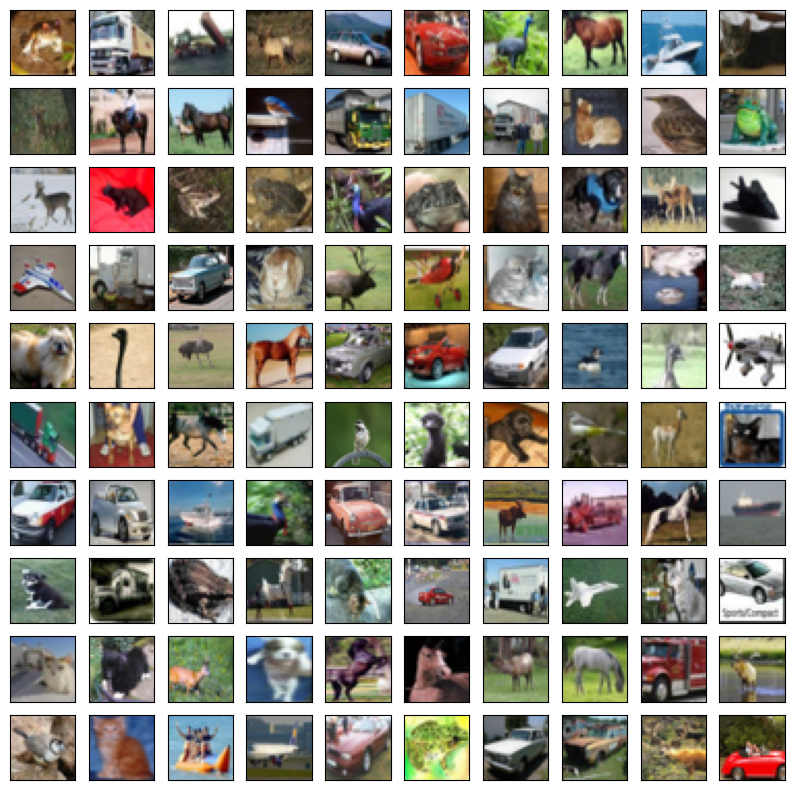

Forma de y_train: (50000, 10)
Forma de y_test: (10000, 10)


In [6]:
# Cargar datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 📌 Mostrar los primeros 100 elementos del dataset
print("100 primeros elementos del conjunto de entrenamiento")
f = plt.figure(figsize=(10, 10))
for i in range(10):
    for j in range(10):
        ax = f.add_subplot(10, 10, i + j*10 + 1)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(x_train[i + j*10])  # ❌ Quité cmap="gray"
plt.show()

#print(y_train[:100])

# 📌 Normalización
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 📌 One-hot encoding de las etiquetas
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Verificar dimensiones
print("Forma de y_train:", y_train.shape)
print("Forma de y_test:", y_test.shape)



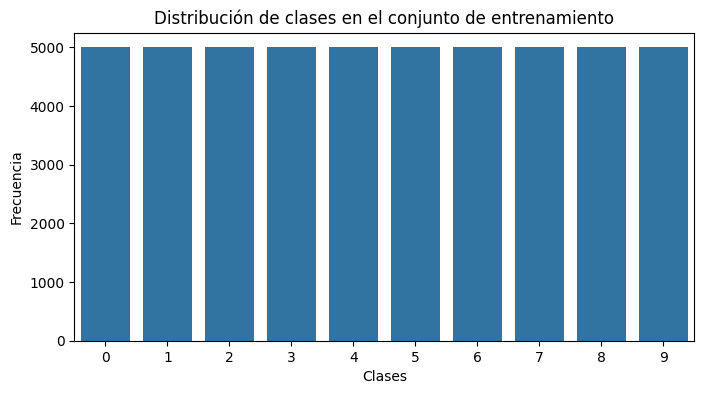

In [8]:
# Convertir de one-hot a valores enteros si es necesario
if y_train.ndim > 1 and y_train.shape[1] == 10:
    y_train_2 = np.argmax(y_train, axis=1)

# Contar frecuencia de clases
unique, counts = np.unique(y_train_2, return_counts=True)

# Graficar distribución de clases
plt.figure(figsize=(8,4))
sn.barplot(x=unique, y=counts)
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.title("Distribución de clases en el conjunto de entrenamiento")
plt.xticks(range(10))
plt.show()


Media de los píxeles por canal (R, G, B): [0.4914009  0.48215896 0.4465308 ]
Desviación estándar de los píxeles por canal (R, G, B): [0.24703279 0.24348423 0.26158753]


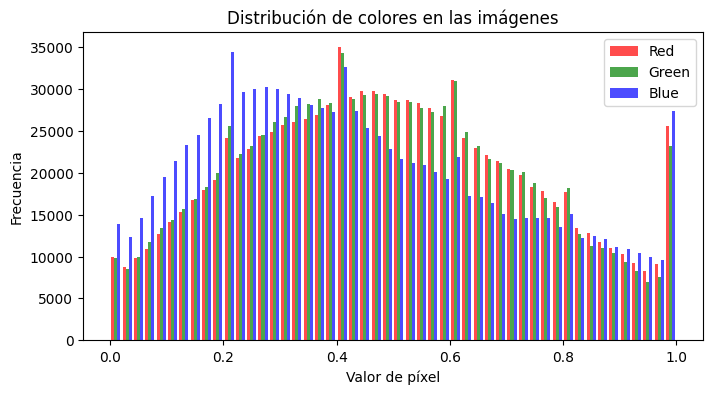

In [9]:
# Media y desviación estándar de los valores de los píxeles (por canal)
mean_pixel = np.mean(x_train, axis=(0,1,2))
std_pixel = np.std(x_train, axis=(0,1,2))
print("Media de los píxeles por canal (R, G, B):", mean_pixel)
print("Desviación estándar de los píxeles por canal (R, G, B):", std_pixel)

# Histograma de valores RGB
plt.figure(figsize=(8,4))
plt.hist(x_train[:1000].reshape(-1, 3), bins=50, color=['r','g','b'], alpha=0.7, label=['Red', 'Green', 'Blue'])
plt.xlabel("Valor de píxel")
plt.ylabel("Frecuencia")
plt.title("Distribución de colores en las imágenes")
plt.legend()
plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# 📌 Definir modelo CNN con 2 capas convolucionales
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")  # 10 clases de CIFAR-10
])

# 📌 Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 📌 Entrenar modelo
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# 📌 Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

# 📌 Predicciones
y_pred = model.predict(x_test)

# Convertir las predicciones y las etiquetas de one-hot a clases
y_pred = np.argmax(y_pred, axis=1)  # Predicciones en formato de clase
y_test_labels = np.argmax(y_test, axis=1)  # Etiquetas reales en formato de clase

# 📌 Mostrar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(map(str, range(10))), yticklabels=list(map(str, range(10))))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 📌 Mostrar el reporte de clasificación
print(classification_report(y_test_labels, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
557/782 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2864 - loss: 1.9457

KeyboardInterrupt: 

In [ ]:
# 📌 Definir modelo CNN con 2 capas convolucionales
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(10, activation="softmax")  # 10 clases de CIFAR-10
])

# 📌 Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 📌 Entrenar modelo
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# 📌 Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4327 - loss: 1.5839 - val_accuracy: 0.6245 - val_loss: 1.0694
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6630 - loss: 0.9623 - val_accuracy: 0.6752 - val_loss: 0.9273
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7242 - loss: 0.7879 - val_accuracy: 0.6773 - val_loss: 0.9170
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7735 - loss: 0.6497 - val_accuracy: 0.6740 - val_loss: 0.9276
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8126 - loss: 0.5342 - val_accuracy: 0.6961 - val_loss: 0.9348
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8578 - loss: 0.4130 - val_accuracy: 0.6916 - val_loss: 0.9964
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8955 - loss: 0.3072 - val_accuracy: 0.6936 - val_loss: 1.0780
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9312 - loss: 0.2085 - val_accuracy: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


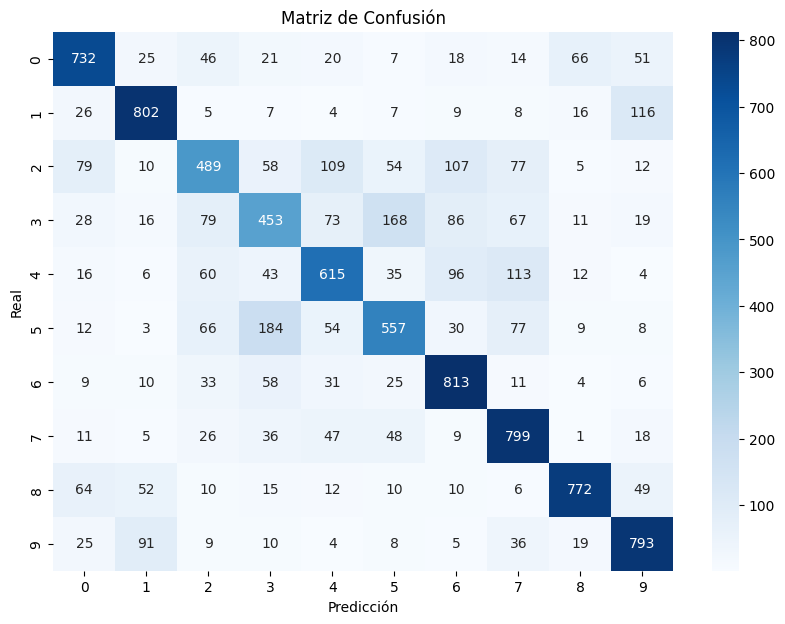

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1000
           1       0.79      0.80      0.79      1000
           2       0.59      0.49      0.54      1000
           3       0.51      0.45      0.48      1000
           4       0.63      0.61      0.62      1000
           5       0.61      0.56      0.58      1000
           6       0.69      0.81      0.74      1000
           7       0.66      0.80      0.72      1000
           8       0.84      0.77      0.81      1000
           9       0.74      0.79      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
# 📌 Predicciones
y_pred = model.predict(x_test)

# Convertir las predicciones y las etiquetas de one-hot a clases
y_pred = np.argmax(y_pred, axis=1)  # Predicciones en formato de clase
y_test_labels = np.argmax(y_test, axis=1)  # Etiquetas reales en formato de clase

# 📌 Mostrar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(map(str, range(10))), yticklabels=list(map(str, range(10))))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 📌 Mostrar el reporte de clasificación
print(classification_report(y_test_labels, y_pred))

In [ ]:
# 📌 Definir modelo CNN con 2 capas convolucionales
model = Sequential([
    Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(32,32,3)),
    Conv2D(64, (3,3), activation="relu", padding="same"),
    Conv2D(128, (3,3), activation="relu", padding="same"),
    Conv2D(256, (3,3), activation="relu", padding="same"),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(10, activation="softmax")  # 10 clases de CIFAR-10
])

# 📌 Compilar modelo
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# 📌 Entrenar modelo
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

# 📌 Evaluar modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.3513 - loss: 1.7561 - val_accuracy: 0.6056 - val_loss: 1.1112
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6422 - loss: 1.0174 - val_accuracy: 0.6517 - val_loss: 0.9870
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.7360 - loss: 0.7520 - val_accuracy: 0.7050 - val_loss: 0.8704
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8120 - loss: 0.5533 - val_accuracy: 0.7163 - val_loss: 0.8806
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.8742 - loss: 0.3656 - val_accuracy: 0.7051 - val_loss: 0.9616
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.9239 - loss: 0.2222 - val_accuracy: 0.7061 - val_loss: 1.2141
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 33ms/step - accuracy: 0.9503 - loss: 0.1494 - val_accuracy: 0.6996 - val_loss: 1.3725
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.9660 - loss: 0.1023 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


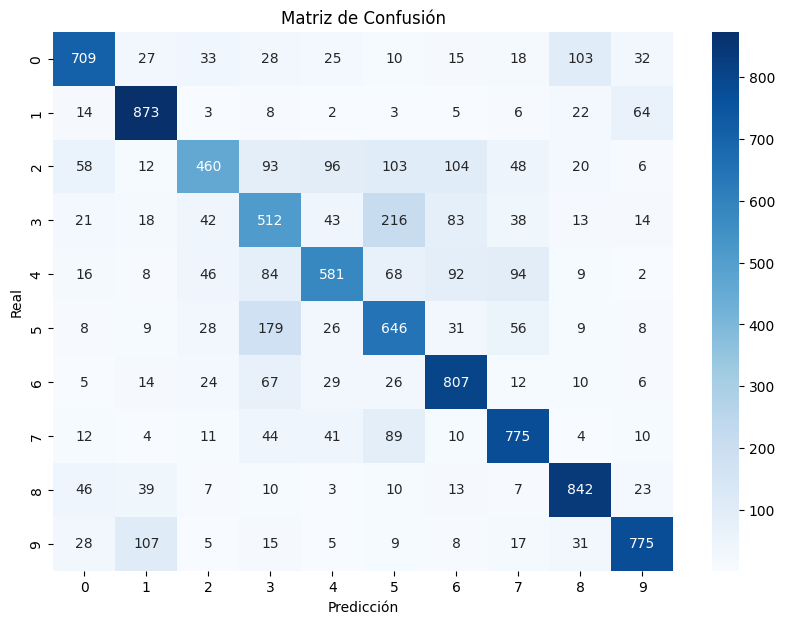

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.79      0.87      0.83      1000
           2       0.70      0.46      0.55      1000
           3       0.49      0.51      0.50      1000
           4       0.68      0.58      0.63      1000
           5       0.55      0.65      0.59      1000
           6       0.69      0.81      0.74      1000
           7       0.72      0.78      0.75      1000
           8       0.79      0.84      0.82      1000
           9       0.82      0.78      0.80      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000



In [ ]:
# 📌 Predicciones
y_pred = model.predict(x_test)

# Convertir las predicciones y las etiquetas de one-hot a clases
y_pred = np.argmax(y_pred, axis=1)  # Predicciones en formato de clase
y_test_labels = np.argmax(y_test, axis=1)  # Etiquetas reales en formato de clase

# 📌 Mostrar la matriz de confusión
cm = confusion_matrix(y_test_labels, y_pred)

# Crear un gráfico de la matriz de confusión
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(map(str, range(10))), yticklabels=list(map(str, range(10))))
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()

# 📌 Mostrar el reporte de clasificación
print(classification_report(y_test_labels, y_pred))